In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fp = "data/maakond_shp/maakond_20221201.shp"
counties_map_df = gpd.read_file(fp)

counties_map_df.head()

MNIMI MKOOD                                           geometry
0     Saare maakond  0074  MULTIPOLYGON (((463065.250 6485466.470, 463066...
1  Viljandi maakond  0084  MULTIPOLYGON (((621348.334 6444270.896, 621229...
2      Hiiu maakond  0039  MULTIPOLYGON (((441870.547 6531043.559, 441876...
3     Harju maakond  0037  MULTIPOLYGON (((555043.219 6611619.488, 555043...
4     Lääne maakond  0056  MULTIPOLYGON (((464366.296 6523548.122, 464371...

<AxesSubplot: >

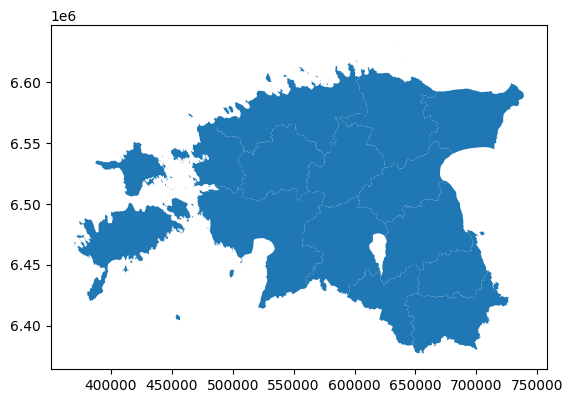

In [3]:
counties_map_df.plot()

In [4]:
counties_avg_df = pd.read_csv('data/keskmised_palgad_maakonniti.csv')
counties_avg_df = counties_avg_df.rename(columns = {'Keskmine brutokuupalk': 'Maakond'})
counties_avg_df.head()

Maakond  2018  2019  2020  2021
0     Harju maakond  1455  1531  1588  1694
1      Hiiu maakond   944   993  1063  1194
2  Ida-Viru maakond  1054  1147  1161  1202
3    Jõgeva maakond  1027  1066  1145  1241
4     Järva maakond  1088  1192  1282  1340

In [5]:
local_govs_df = pd.read_csv('data/omavalitsused.csv')
# replace does full replacement searches, unless you turn on the regex switch
local_govs_df['Valitsus'] = local_govs_df['Omavalitsus'].replace('vald$', 'Vallavalitsus', regex=True).replace('linn$', 'Linnavalitsus', regex=True)
# to later join with wages dataframe
local_govs_df = local_govs_df.set_index('Valitsus')
local_govs_df.head()

Omavalitsus        Maakond
Valitsus                                              
Anija Vallavalitsus          Anija vald  Harju maakond
Harku Vallavalitsus          Harku vald  Harju maakond
Jõelähtme Vallavalitsus  Jõelähtme vald  Harju maakond
Keila Linnavalitsus          Keila linn  Harju maakond
Kiili Vallavalitsus          Kiili vald  Harju maakond

In [6]:
local_govs_avg_2018_df = pd.read_excel(
    "data/ametnike_palgad_2018.xlsx", 
    sheet_name=0, 
    header=2, 
    skiprows=[3]
)

local_govs_avg_2018_df.loc[local_govs_avg_2018_df['Asutus'] == 'Otepää Valalvalitsus', 'Asutus'] = 'Otepää Vallavalitsus'
local_govs_avg_2018_df.loc[local_govs_avg_2018_df['Asutus'] == 'Loksa Linnavolikogu', 'Asutus'] = 'Loksa Linnavalitsus'
local_govs_avg_2018_df['Asutus'] = local_govs_avg_2018_df['Asutus'].replace('  ', ' ', regex=True)

local_govs_avg_2018_df.head()

Asutus Struktuuriüksus Allstruktuuriüksus      Ametikoht  \
0  Alutaguse Vallavalitsus             NaN                NaN     Vallavanem   
1  Alutaguse Vallavalitsus             NaN                NaN  Abivallavanem   
2  Alutaguse Vallavalitsus             NaN                NaN  Abivallavanem   
3  Alutaguse Vallavalitsus             NaN                NaN    Finantsjuht   
4  Alutaguse Vallavalitsus             NaN                NaN  Vallasekretär   

  Eesnimi Perekonnanimi  Ametniku koormus ametkohal  Põhipalk  
0   Tauno        Võhmar                         1.0    3600.0  
1    Oleg     Kuznetsov                         1.0    2800.0  
2   Kairi        Soomer                         1.0    2800.0  
3   Luule         Salla                         1.0    2200.0  
4   Lehti   Targijainen                         1.0    2200.0

In [7]:
local_govs_avg_2019_df = pd.read_excel(
    "data/ametnike_palgad_2019.xlsx", 
    sheet_name=0, 
    header=2, 
    skiprows=[3]
)
local_govs_avg_2019_df['Ametniku koormus ametkohal'] = local_govs_avg_2019_df['Ametniku koormus ametkohal'].replace('1,0', '1.0')
local_govs_avg_2019_df['Ametniku koormus ametkohal'] = local_govs_avg_2019_df['Ametniku koormus ametkohal'].astype(float)

local_govs_avg_2019_df.head()

Asutus Struktuuriüksus Allstruktuuriüksus      Ametikoht  \
0  Alutaguse Vallavalitsus             NaN                NaN     Vallavanem   
1  Alutaguse Vallavalitsus             NaN                NaN  Abivallavanem   
2  Alutaguse Vallavalitsus             NaN                NaN  Abivallavanem   
3  Alutaguse Vallavalitsus             NaN                NaN    Finantsjuht   
4  Alutaguse Vallavalitsus             NaN                NaN  Vallasekretär   

  Eesnimi Perekonnanimi  Ametniku koormus ametkohal  Põhipalk  
0   Tauno        Võhmar                         1.0    3600.0  
1    Oleg     Kuznetsov                         1.0    2800.0  
2   Kairi        Soomer                         1.0    2800.0  
3   Luule         Salla                         1.0    2200.0  
4   Lehti   Targijainen                         1.0    2200.0

In [8]:
changes = {
    'Emmaste Osavalla Valitsus': 'Hiiumaa Vallavalitsus',
    'Kullamaa Osavallavalitsus': 'Lääne-Nigula Vallavalitsus',
    'Kõrgessaare Osavalla Valitsus': 'Hiiumaa Vallavalitsus',
    'Käina Osavalla Valitsus': 'Hiiumaa Vallavalitsus',
    'Kärdla Osavalla Valitsus': 'Hiiumaa Vallavalitsus',
    'Martna Osavallavalitsus': 'Lääne-Nigula Vallavalitsus',
    'Noarootsi Osavallavalitsus': 'Lääne-Nigula Vallavalitsus',
    'Nõva Osavallavalitsus': 'Lääne-Nigula Vallavalitsus',
    'Pühalepa Osavalla Valitsus': 'Hiiumaa Vallavalitsus',
    'Vigala Osavallavalitsus': 'Märjamaa Vallavalitsus',
    'KIHNU VALLAVALITSUS': 'Kihnu Vallavalitsus',
    'Narva Linna Arenduse ja Ökonoomika Amet': 'Narva Linnavalitsus',
    'Narva Linna Sotsiaalabiamet': 'Narva Linnavalitsus', 
    'Narva Linnaarhiiv': 'Narva Linnavalitsus',
    'Narva Linnakantselei': 'Narva Linnavalitsus',
    'Narva Linnavalitsuse Arhitektuuri- ja Linnaplaneerimise Amet': 'Narva Linnavalitsus',
    'Narva Linnavalitsuse Linnamajandusamet': 'Narva Linnavalitsus',
    'Narva Linnavalitsuse Rahandusamet': 'Narva Linnavalitsus',
    'Narva Linnavolikogu kantselei': 'Narva Linnavalitsus',
    'Kultuuriosakond': 'Narva Linnavalitsus',
    'Narva Linnavalitsuse Kultuuriosakond': 'Narva Linnavalitsus',
    'Narva Lnnavolikogu Kantselei ': 'Narva Linnavalitsus',
    'Narva Rahandusamet': 'Narva Linnavalitsus',
    'Kohtla-Järve Linnavolikogu': 'Kohtla-Järve Linnavalitsus',
    'Haabersti Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Kristiine Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Lasnamäe Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Mustamäe Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Nõmme Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Pirita Linnaosa Valitsus': 'Tallinna Linnavalitsus',
    'Põhja-Tallinna Valitsus': 'Tallinna Linnavalitsus',
    'Tallinna Keskkonna- ja Kommunaalamet': 'Tallinna Linnavalitsus',
    'Tallinna Kesklinna Valitsus': 'Tallinna Linnavalitsus', 
    'Tallinna Kultuuri- ja Spordiamet': 'Tallinna Linnavalitsus',
    'Tallinna Linnakantselei': 'Tallinna Linnavalitsus', 
    'Tallinna Linnaplaneerimise Amet': 'Tallinna Linnavalitsus',
    'Tallinna Linnavaraamet': 'Tallinna Linnavalitsus', 
    'Tallinna Linnavolikogu Kantselei': 'Tallinna Linnavalitsus',
    'Tallinna Munitsipaalpolitsei Amet': 'Tallinna Linnavalitsus', 
    'Tallinna Perekonnaseisuamet': 'Tallinna Linnavalitsus',
    'Tallinna Sotsiaal- ja Tervishoiuamet': 'Tallinna Linnavalitsus',
    'Tallinna Strateegiakeskus': 'Tallinna Linnavalitsus', 
    'Tallinna Transpordiamet': 'Tallinna Linnavalitsus',
    'Tallinna Haridusamet': 'Tallinna Linnavalitsus',
    'Harku Vallavolikogu Kantselei': 'Harku Vallavalitsus',
    'Jõgeva Vallavolikogu kantselei': 'Jõgeva Vallavalitsus',
    'Haapsalu linnavalitsus': 'Haapsalu Linnavalitsus',
    'Raasiku vallavalitsus': 'Raasiku Vallavalitsus',
    'Türi vallavalitsus': 'Türi Vallavalitsus',
    'Viru-Nigula vallavalitsus': 'Viru-Nigula Vallavalitsus',
    'Tartu Linnavolikogu ': 'Tartu Linnavalitsus',
    'Haapsalu linn': 'Haapsalu Linnavalitsus',
    'Viljandi linnavalitsus': 'Viljandi Linnavalitsus',
    'Rapla Vallavalitsus ': 'Rapla Vallavalitsus'
}

In [9]:
local_govs_avg_2020_df = pd.read_excel(
    "data/ametnike_palgad_2020.xlsx", 
    sheet_name=0, 
    header=2, 
    skiprows=[3]
)

local_govs_avg_2020_df['Asutus'] = local_govs_avg_2020_df['Asutus'].replace(changes)
local_govs_avg_2020_df['Asutus'] = local_govs_avg_2020_df['Asutus'].replace('\s$', '', regex=True)

local_govs_avg_2020_df.head()

Asutus               Struktuuriüksus  \
0  Alutaguse Vallavalitsus                           NaN   
1  Alutaguse Vallavalitsus                Vallakantselei   
2  Alutaguse Vallavalitsus                Vallakantselei   
3  Alutaguse Vallavalitsus                Vallakantselei   
4  Alutaguse Vallavalitsus  Majandus- ja arenguteenistus   

                 Ametikoht Eesnimi Perekonnanimi  Ametniku koormus ametkohal  \
0               Vallavanem   Tauno        Võhmar                         1.0   
1            Vallasekretär   Lehti   Targijainen                         1.0   
2       Vallasekretäri abi    Lia        Teeväli                         1.0   
3  Sekretär-registripidaja  Katrin    Junolainen                         1.0   
4            Abivallavanem    Oleg     Kuznetsov                         1.0   

   Põhipalk  
0    3600.0  
1    2200.0  
2    1750.0  
3    1400.0  
4    2800.0

In [10]:
local_govs_avg_2021_df = pd.read_excel(
    "data/ametnike_palgad_2021.xlsx", 
    sheet_name=0, 
    header=3, 
    skiprows=[4]
)

local_govs_avg_2021_df['Asutus'] = local_govs_avg_2021_df['Asutus'].replace(changes)
local_govs_avg_2021_df['Asutus'] = local_govs_avg_2021_df['Asutus'].replace(' $', '', regex=True)

local_govs_avg_2021_df.head()

Asutus    Struktuuriüksus  \
0  Alutaguse Vallavalitsus                NaN   
1  Alutaguse Vallavalitsus     Vallakantselei   
2  Alutaguse Vallavalitsus     Vallakantselei   
3  Alutaguse Vallavalitsus     Vallakantselei   
4  Alutaguse Vallavalitsus  Majandusteenistus   

                          Ametikoht Eesnimi Perekonnanimi  \
0                        Vallavanem   Tauno        Võhmar   
1                     Vallasekretär   Lehti   Targijainen   
2                  Teabespetsialist  Katrin    Junolainen   
3  Õigus- ja andmekaitsespetsialist   Tairi          Hütt   
4                        Ehitusjuht    Rein      Merirand   

   Ametniku koormus ametkohal  Põhipalk  
0                         1.0    4000.0  
1                         1.0    2600.0  
2                         1.0    1700.0  
3                         1.0    1800.0  
4                         1.0    2300.0

In [11]:
counties_govs_avg_2018_df = local_govs_avg_2018_df.join(local_govs_df, on='Asutus')
counties_govs_avg_2018_df = counties_govs_avg_2018_df.groupby(['Maakond']).mean(numeric_only=True)
counties_govs_avg_2018_df.head()

Ametniku koormus ametkohal     Põhipalk
Maakond                                                  
Harju maakond                       0.990677  1739.543234
Hiiu maakond                        0.920238  1178.190476
Ida-Viru maakond                    0.993648  1605.672787
Järva maakond                       0.993860  1533.508772
Jõgeva maakond                      1.000000  1400.123810

In [12]:
counties_govs_avg_2019_df = local_govs_avg_2019_df.join(local_govs_df, on='Asutus')
counties_govs_avg_2019_df = counties_govs_avg_2019_df.groupby(['Maakond']).mean(numeric_only=True)
counties_govs_avg_2019_df.head()

Ametniku koormus ametkohal     Põhipalk
Maakond                                                  
Harju maakond                       0.992910  1822.040615
Hiiu maakond                        0.923864  1230.000000
Ida-Viru maakond                    0.985743  1783.335341
Järva maakond                       0.992478  1581.548673
Jõgeva maakond                      0.995413  1463.330275

In [13]:
counties_govs_avg_2020_df = local_govs_avg_2020_df.join(local_govs_df, on='Asutus')
counties_govs_avg_2020_df = counties_govs_avg_2020_df.groupby(['Maakond']).mean(numeric_only=True)
counties_govs_avg_2020_df.head()

Ametniku koormus ametkohal     Põhipalk
Maakond                                                  
Harju maakond                       0.994743  1869.191730
Hiiu maakond                        0.928409  1212.613636
Ida-Viru maakond                    0.985687  1798.998092
Järva maakond                       0.991827  1621.875000
Jõgeva maakond                      0.975248  1512.128713

In [14]:
counties_govs_avg_2021_df = local_govs_avg_2021_df.join(local_govs_df, on='Asutus')
counties_govs_avg_2021_df = counties_govs_avg_2021_df.groupby(['Maakond']).mean(numeric_only=True)
counties_govs_avg_2021_df.head()

Ametniku koormus ametkohal     Põhipalk
Maakond                                                  
Harju maakond                       0.990364  2094.435838
Hiiu maakond                        0.896809  1427.765957
Ida-Viru maakond                    0.984454  1953.702929
Järva maakond                       1.000000  1843.900000
Jõgeva maakond                      0.979381  1698.969072

In [15]:
counties_govs_avg_df = counties_govs_avg_2018_df[['Põhipalk']].join(counties_govs_avg_2019_df[['Põhipalk']], lsuffix='2018', rsuffix=' 2019')
counties_govs_avg_df = counties_govs_avg_df.join(counties_govs_avg_2020_df[['Põhipalk']], rsuffix=' 2020')
counties_govs_avg_df = counties_govs_avg_df.join(counties_govs_avg_2021_df[['Põhipalk']], rsuffix=' 2021')
counties_govs_avg_df.columns = ['2018', '2019', '2020', '2021']
counties_govs_avg_df = counties_govs_avg_df.reset_index()
counties_govs_avg_df.head()

Maakond         2018         2019         2020         2021
0     Harju maakond  1739.543234  1822.040615  1869.191730  2094.435838
1      Hiiu maakond  1178.190476  1230.000000  1212.613636  1427.765957
2  Ida-Viru maakond  1605.672787  1783.335341  1798.998092  1953.702929
3     Järva maakond  1533.508772  1581.548673  1621.875000  1843.900000
4    Jõgeva maakond  1400.123810  1463.330275  1512.128713  1698.969072

In [16]:
test_2021 = counties_govs_avg_df[['Maakond', '2021']].merge(counties_avg_df[['Maakond', '2021']], on='Maakond', suffixes=(' KOV', 'ÜLD'))
test_2021.columns = ['Maakond', 'KOV', 'ÜLD']

test_2021['KOV SUUREM'] = round(test_2021['KOV'] * 100 / test_2021['ÜLD'] - 100, 2)

test_2021.head()

Maakond          KOV   ÜLD  KOV SUUREM
0     Harju maakond  2094.435838  1694       23.64
1      Hiiu maakond  1427.765957  1194       19.58
2  Ida-Viru maakond  1953.702929  1202       62.54
3     Järva maakond  1843.900000  1340       37.60
4    Jõgeva maakond  1698.969072  1241       36.90

In [17]:
test_2021_merged = counties_map_df.merge(test_2021, left_on='MNIMI', right_on='Maakond')
test_2021_merged = test_2021_merged[['Maakond', 'KOV', 'ÜLD', 'KOV SUUREM', 'geometry']]
test_2021_merged.head()

Maakond          KOV   ÜLD  KOV SUUREM  \
0     Saare maakond  1772.063645  1247       42.11   
1  Viljandi maakond  1824.058065  1285       41.95   
2      Hiiu maakond  1427.765957  1194       19.58   
3     Harju maakond  2094.435838  1694       23.64   
4     Lääne maakond  1698.869565  1308       29.88   

                                            geometry  
0  MULTIPOLYGON (((463065.250 6485466.470, 463066...  
1  MULTIPOLYGON (((621348.334 6444270.896, 621229...  
2  MULTIPOLYGON (((441870.547 6531043.559, 441876...  
3  MULTIPOLYGON (((555043.219 6611619.488, 555043...  
4  MULTIPOLYGON (((464366.296 6523548.122, 464371...

In [18]:
test_2021_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Maakond     15 non-null     object  
 1   KOV         15 non-null     float64 
 2   ÜLD         15 non-null     int64   
 3   KOV SUUREM  15 non-null     float64 
 4   geometry    15 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 720.0+ bytes


In [19]:
test_2021_merged['KOV SUUREM'].describe()

count    15.000000
mean     35.899333
std      10.236308
min      19.580000
25%      29.125000
50%      36.280000
75%      40.650000
max      62.540000
Name: KOV SUUREM, dtype: float64

/var/folders/wg/4btjy_4s1x94459gqxsb1df80000gn/T/ipykernel_16037/1315605390.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


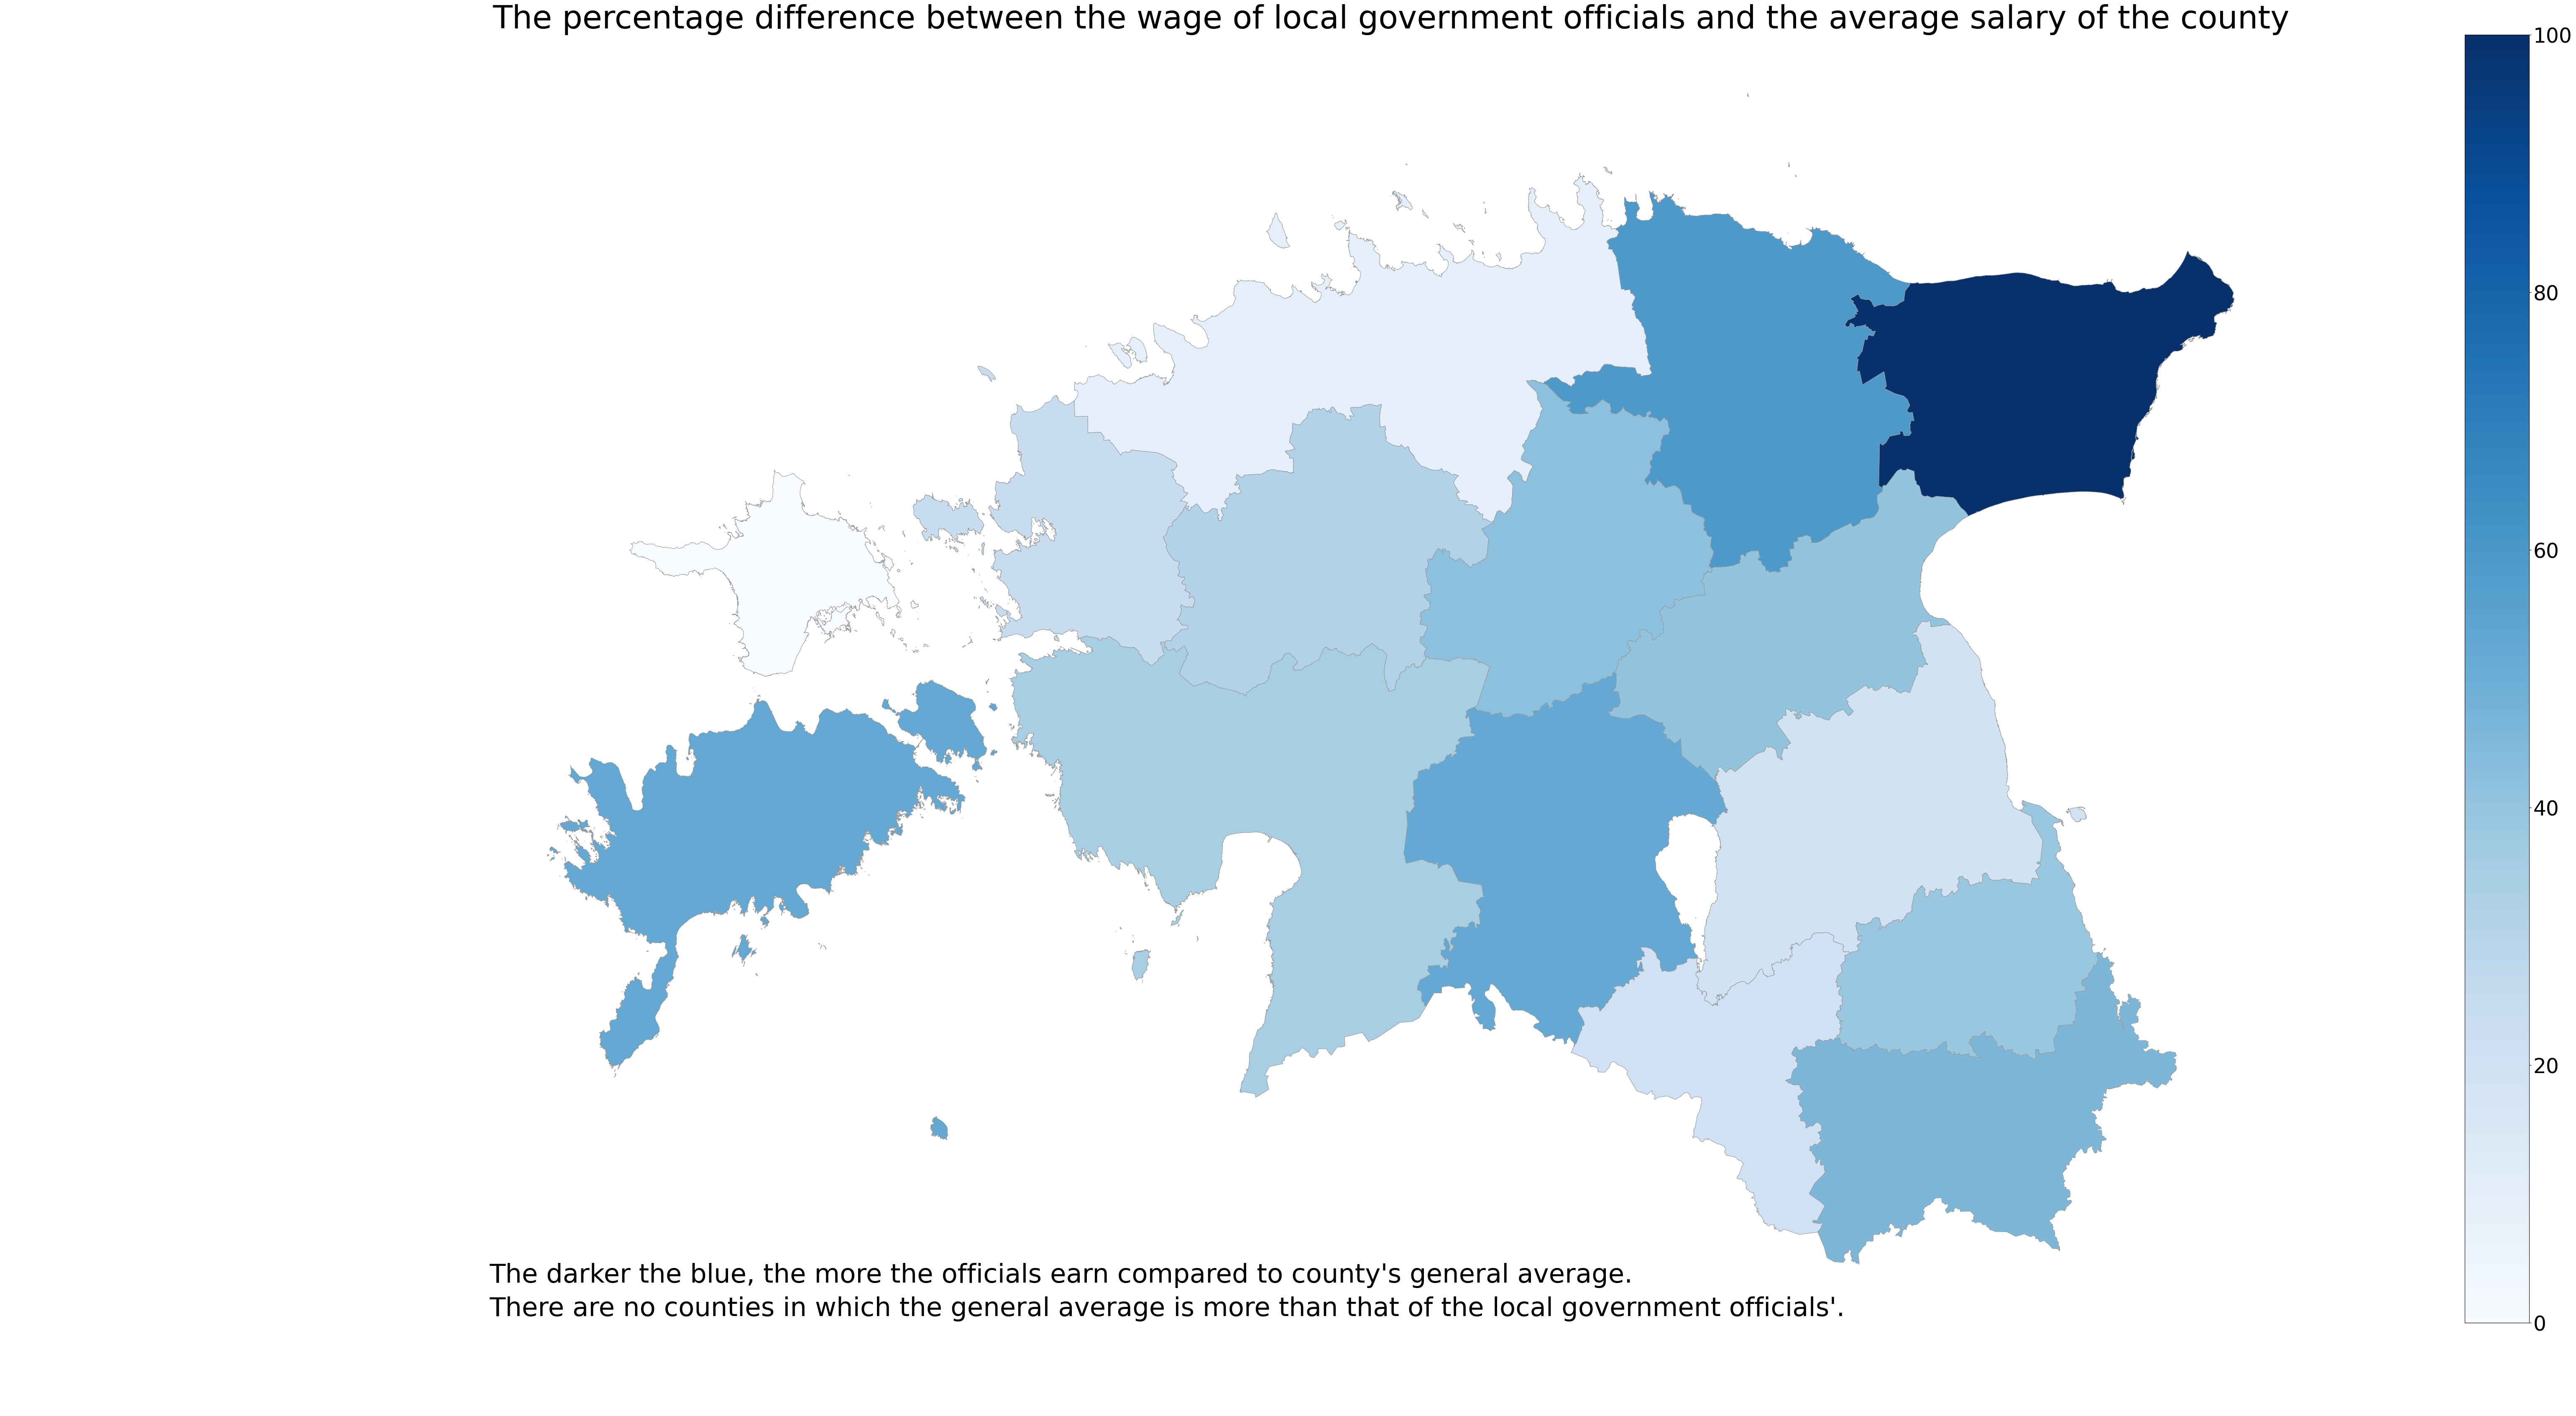

In [53]:
variable = 'KOV SUUREM'
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, figsize=(90, 40))
ax.axis('off')
ax.set_title('The percentage difference between the wage of local government officials and the average salary of the county', fontdict={'fontsize': '55', 'fontweight' : '3'})
ax.annotate('The darker the blue, the more the officials earn compared to county\'s general average.', xy=(0.13, .08), xycoords='figure fraction', fontsize=45, color='#000000')
ax.annotate('There are no counties in which the general average is more than that of the local government officials\'.', xy=(0.13, .06), xycoords='figure fraction', fontsize=45, color='#000000')
ax.set_facecolor('#e7e6e6')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=35)

test_2021_merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.6')

plt.savefig('data/kov_avg_map.png', bbox_inches='tight', transparent=True)

In [21]:
fp_2 = "data/omavalitsus_shp/omavalitsus_20221201.shp"
municipalities_map_df = gpd.read_file(fp_2)

municipalities_map_df.head()

ONIMI OKOOD          MNIMI MKOOD TYYP  \
0     Ruhnu vald  0689  Saare maakond  0074    1   
1      Muhu vald  0478  Saare maakond  0074    1   
2    Viimsi vald  0890  Harju maakond  0037    1   
3  Saaremaa vald  0714  Saare maakond  0074    1   
4   Hiiumaa vald  0205   Hiiu maakond  0039    1   

                                            geometry  
0  MULTIPOLYGON (((455182.374 6405005.154, 455184...  
1  MULTIPOLYGON (((463065.250 6485466.470, 463066...  
2  MULTIPOLYGON (((555043.219 6611619.488, 555043...  
3  MULTIPOLYGON (((457728.127 6476516.927, 457729...  
4  MULTIPOLYGON (((441870.547 6531043.559, 441876...

<AxesSubplot: >

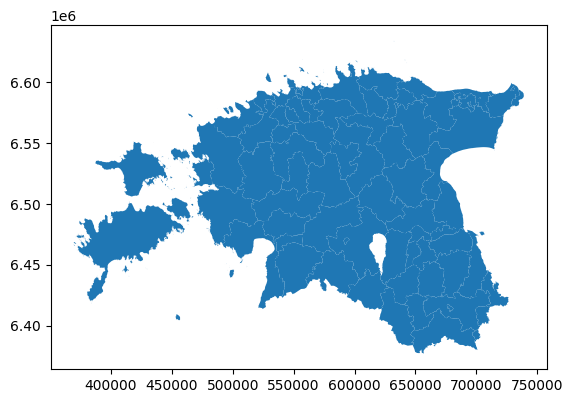

In [22]:
municipalities_map_df.plot()

In [23]:
municipalities_avg_2018_df = local_govs_avg_2018_df.groupby('Asutus').mean(numeric_only=True)
municipalities_avg_2019_df = local_govs_avg_2019_df.groupby('Asutus').mean(numeric_only=True)
municipalities_avg_2020_df = local_govs_avg_2020_df.groupby('Asutus').mean(numeric_only=True)
municipalities_avg_2021_df = local_govs_avg_2021_df.groupby('Asutus').mean(numeric_only=True)

municipalities_avg_2018_df.head()

Ametniku koormus ametkohal     Põhipalk
Asutus                                                          
Alutaguse Vallavalitsus                    0.987500  1805.625000
Anija Vallavalitsus                        0.952381  1399.880952
Antsla Vallavalitsus                       1.000000  1562.307692
Elva Vallavalitsus                         0.987179  1629.487179
Haapsalu Linnavalitsus                     0.981250  1649.968750

In [24]:
municipalities_avg_2020_df.index

Index(['Alutaguse Vallavalitsus', 'Anija Vallavalitsus',
       'Antsla Vallavalitsus', 'Elva Vallavalitsus', 'Haapsalu Linnavalitsus',
       'Haljala Vallavalitsus', 'Harku Vallavalitsus', 'Hiiumaa Vallavalitsus',
       'Häädemeeste Vallavalitsus', 'Järva Vallavalitsus',
       'Jõelähtme Vallavalitsus', 'Jõgeva Vallavalitsus',
       'Jõhvi Vallavalitsus', 'Kadrina Vallavalitsus', 'Kambja Vallavalitsus',
       'Kanepi Vallavalitsus', 'Kastre Vallavalitsus', 'Kehtna Vallavalitsus',
       'Keila Linnavalitsus', 'Kihnu Vallavalitsus', 'Kiili Vallavalitsus',
       'Kohila Vallavalitsus', 'Kohtla-Järve Linnavalitsus',
       'Kose Vallavalitsus', 'Kuusalu Vallavalitsus', 'Loksa Linnavalitsus',
       'Luunja Vallavalitsus', 'Lääne-Harju Vallavalitsus',
       'Lääne-Nigula Vallavalitsus', 'Lääneranna Vallavalitsus',
       'Lüganuse Vallavalitsus', 'Maardu Linnavalitsus', 'Muhu Vallavalitsus',
       'Mulgi Vallavalitsus', 'Mustvee Vallavalitsus',
       'Märjamaa Vallavalitsus', 'Na

In [25]:
municipalities_avg_df = municipalities_avg_2018_df.join(municipalities_avg_2019_df, lsuffix=' 2018', rsuffix=' 2019')
municipalities_avg_df = municipalities_avg_df.join(municipalities_avg_2020_df, rsuffix=' 2020')
municipalities_avg_df = municipalities_avg_df.join(municipalities_avg_2021_df, rsuffix=' 2021')

municipalities_avg_df = municipalities_avg_df[['Põhipalk 2018', 'Põhipalk 2019', 'Põhipalk', 'Põhipalk 2021']]
municipalities_avg_df = municipalities_avg_df.reset_index()
municipalities_avg_df.columns = ['Asutus', '2018', '2019', '2020', '2021']

municipalities_avg_df['Muutus kokku €'] = municipalities_avg_df['2021'] - municipalities_avg_df['2018']
municipalities_avg_df['Muutus kokku %'] = municipalities_avg_df['2021'] * 100 / municipalities_avg_df['2018'] - 100

municipalities_avg_df['Keskmine aastane muutus €'] = (
    (municipalities_avg_df['2019'] - municipalities_avg_df['2018']) +
    (municipalities_avg_df['2020'] - municipalities_avg_df['2019']) +
    (municipalities_avg_df['2021'] - municipalities_avg_df['2020'])
) / 3
municipalities_avg_df['Keskmine aastane muutus %'] = (
    (municipalities_avg_df['2019'] * 100 / municipalities_avg_df['2018'] - 100) +
    (municipalities_avg_df['2020'] * 100 / municipalities_avg_df['2019'] - 100) +
    (municipalities_avg_df['2021'] * 100 / municipalities_avg_df['2020'] - 100)
) / 3

municipalities_avg_df = municipalities_avg_df.join(local_govs_df, on='Asutus')

municipalities_avg_df

Asutus         2018         2019         2020  \
0      Alutaguse Vallavalitsus  1805.625000  1870.208333  1877.400000   
1          Anija Vallavalitsus  1399.880952  1698.095238  1672.045455   
2         Antsla Vallavalitsus  1562.307692  1573.571429  1558.000000   
3           Elva Vallavalitsus  1629.487179  1634.358974  1622.564103   
4       Haapsalu Linnavalitsus  1649.968750  1654.656250  1671.843750   
..                         ...          ...          ...          ...   
74   Viru-Nigula Vallavalitsus  1810.000000  1855.000000  1895.750000   
75        Vormsi Vallavalitsus  1059.000000  1099.000000  1042.600000   
76  Väike-Maarja Vallavalitsus  1409.523810  1415.714286  1394.285714   
77          Võru Linnavalitsus  1551.744186  1601.190476  1684.444444   
78          Võru Vallavalitsus  1472.540541  1533.388889  1532.486486   

           2021  Muutus kokku €  Muutus kokku %  Keskmine aastane muutus €  \
0   2043.478261      237.853261       13.172905                  79.284420   
1   1850.434783      450.553830       32.185153                 150.184610   
2   1741.000000      178.692308       11.437715                  59.564103   
3   1841.250000      211.762821       12.995673                  70.587607   
4   1882.000000      232.031250       14.062766                  77.343750   
..          ...             ...             ...                        ...   
74  1929.117647      119.117647        6.581085                  39.705882   
75  1101.714286       42.714286        4.033455                  14.238095   
76  1668.809524      259.285714       18.395270                  86.428571   
77  1747.222222      195.478036       12.597311                  65.159345   
78  1658.540541      186.000000       12.631231                  62.000000   

    Keskmine aastane muutus %        Omavalitsus             Maakond  
0                    4.269169     Alutaguse vald    Ida-Viru maakond  
1                   10.145900         Anija vald       Harju maakond  
2                    3.825745        Antsla vald        Võru maakond  
3                    4.351697          Elva vald       Tartu maakond  
4                    4.631053      Haapsalu linn       Lääne maakond  
..                        ...                ...                 ...  
74                   2.147694   Viru-Nigula vald  Lääne-Viru maakond  
75                   1.438367        Vormsi vald       Lääne maakond  
76                   6.204925  Väike-Maarja vald  Lääne-Viru maakond  
77                   4.037638          Võru linn        Võru maakond  
78                   4.099604          Võru vald        Võru maakond  

[79 rows x 11 columns]

In [26]:
municipalities_avg_df.describe()

2018         2019         2020         2021  Muutus kokku €  \
count    79.000000    79.000000    79.000000    79.000000       79.000000   
mean   1553.275725  1634.674039  1652.544293  1834.427857      281.152132   
std     206.750227   216.049135   226.947626   233.881884      112.935538   
min    1059.000000  1099.000000  1042.600000  1101.714286       16.360704   
25%    1412.698864  1491.544872  1525.482374  1710.278579      205.396805   
50%    1518.421053  1609.827957  1636.500000  1801.290323      264.296188   
75%    1660.044228  1757.593873  1748.352596  1939.732143      350.725019   
max    2178.083333  2384.652174  2420.000000  2522.321429      570.957500   

       Muutus kokku %  Keskmine aastane muutus €  Keskmine aastane muutus %  
count       79.000000                  79.000000                  79.000000  
mean        18.399342                  93.717377                   5.932983  
std          7.884329                  37.645179                   2.459481  
min          1.174032                   5.453568                   0.400436  
25%         12.569944                  68.465602                   4.068621  
50%         18.395270                  88.098729                   6.097618  
75%         23.232748                 116.908340                   7.418181  
max         40.276710                 190.319167                  12.100756

In [27]:
municipalities_merged = municipalities_map_df.merge(municipalities_avg_df, left_on='ONIMI', right_on='Omavalitsus')
municipalities_merged.head()

ONIMI OKOOD          MNIMI MKOOD TYYP  \
0     Ruhnu vald  0689  Saare maakond  0074    1   
1      Muhu vald  0478  Saare maakond  0074    1   
2    Viimsi vald  0890  Harju maakond  0037    1   
3  Saaremaa vald  0714  Saare maakond  0074    1   
4   Hiiumaa vald  0205   Hiiu maakond  0039    1   

                                            geometry                  Asutus  \
0  MULTIPOLYGON (((455182.374 6405005.154, 455184...     Ruhnu Vallavalitsus   
1  MULTIPOLYGON (((463065.250 6485466.470, 463066...      Muhu Vallavalitsus   
2  MULTIPOLYGON (((555043.219 6611619.488, 555043...    Viimsi Vallavalitsus   
3  MULTIPOLYGON (((457728.127 6476516.927, 457729...  Saaremaa Vallavalitsus   
4  MULTIPOLYGON (((441870.547 6531043.559, 441876...   Hiiumaa Vallavalitsus   

          2018         2019         2020         2021  Muutus kokku €  \
0  1308.000000  1491.666667  1206.250000  1640.000000      332.000000   
1  1394.500000  1425.000000  1425.000000  1739.285714      344.785714   
2  2143.509434  2296.217308  2349.352000  2355.457857      211.948423   
3  1531.977273  1609.827957  1628.677083  1778.513505      246.536232   
4  1178.190476  1230.000000  1212.613636  1427.765957      249.575481   

   Muutus kokku %  Keskmine aastane muutus €  Keskmine aastane muutus %  \
0       25.382263                 110.666667                  10.288755   
1       24.724684                 114.928571                   8.080767   
2        9.887917                  70.649474                   3.232701   
3       16.092682                  82.178744                   5.150825   
4       21.182948                  83.191827                   6.908905   

     Omavalitsus        Maakond  
0     Ruhnu vald  Saare maakond  
1      Muhu vald  Saare maakond  
2    Viimsi vald  Harju maakond  
3  Saaremaa vald  Saare maakond  
4   Hiiumaa vald   Hiiu maakond

/var/folders/wg/4btjy_4s1x94459gqxsb1df80000gn/T/ipykernel_16037/1383200040.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


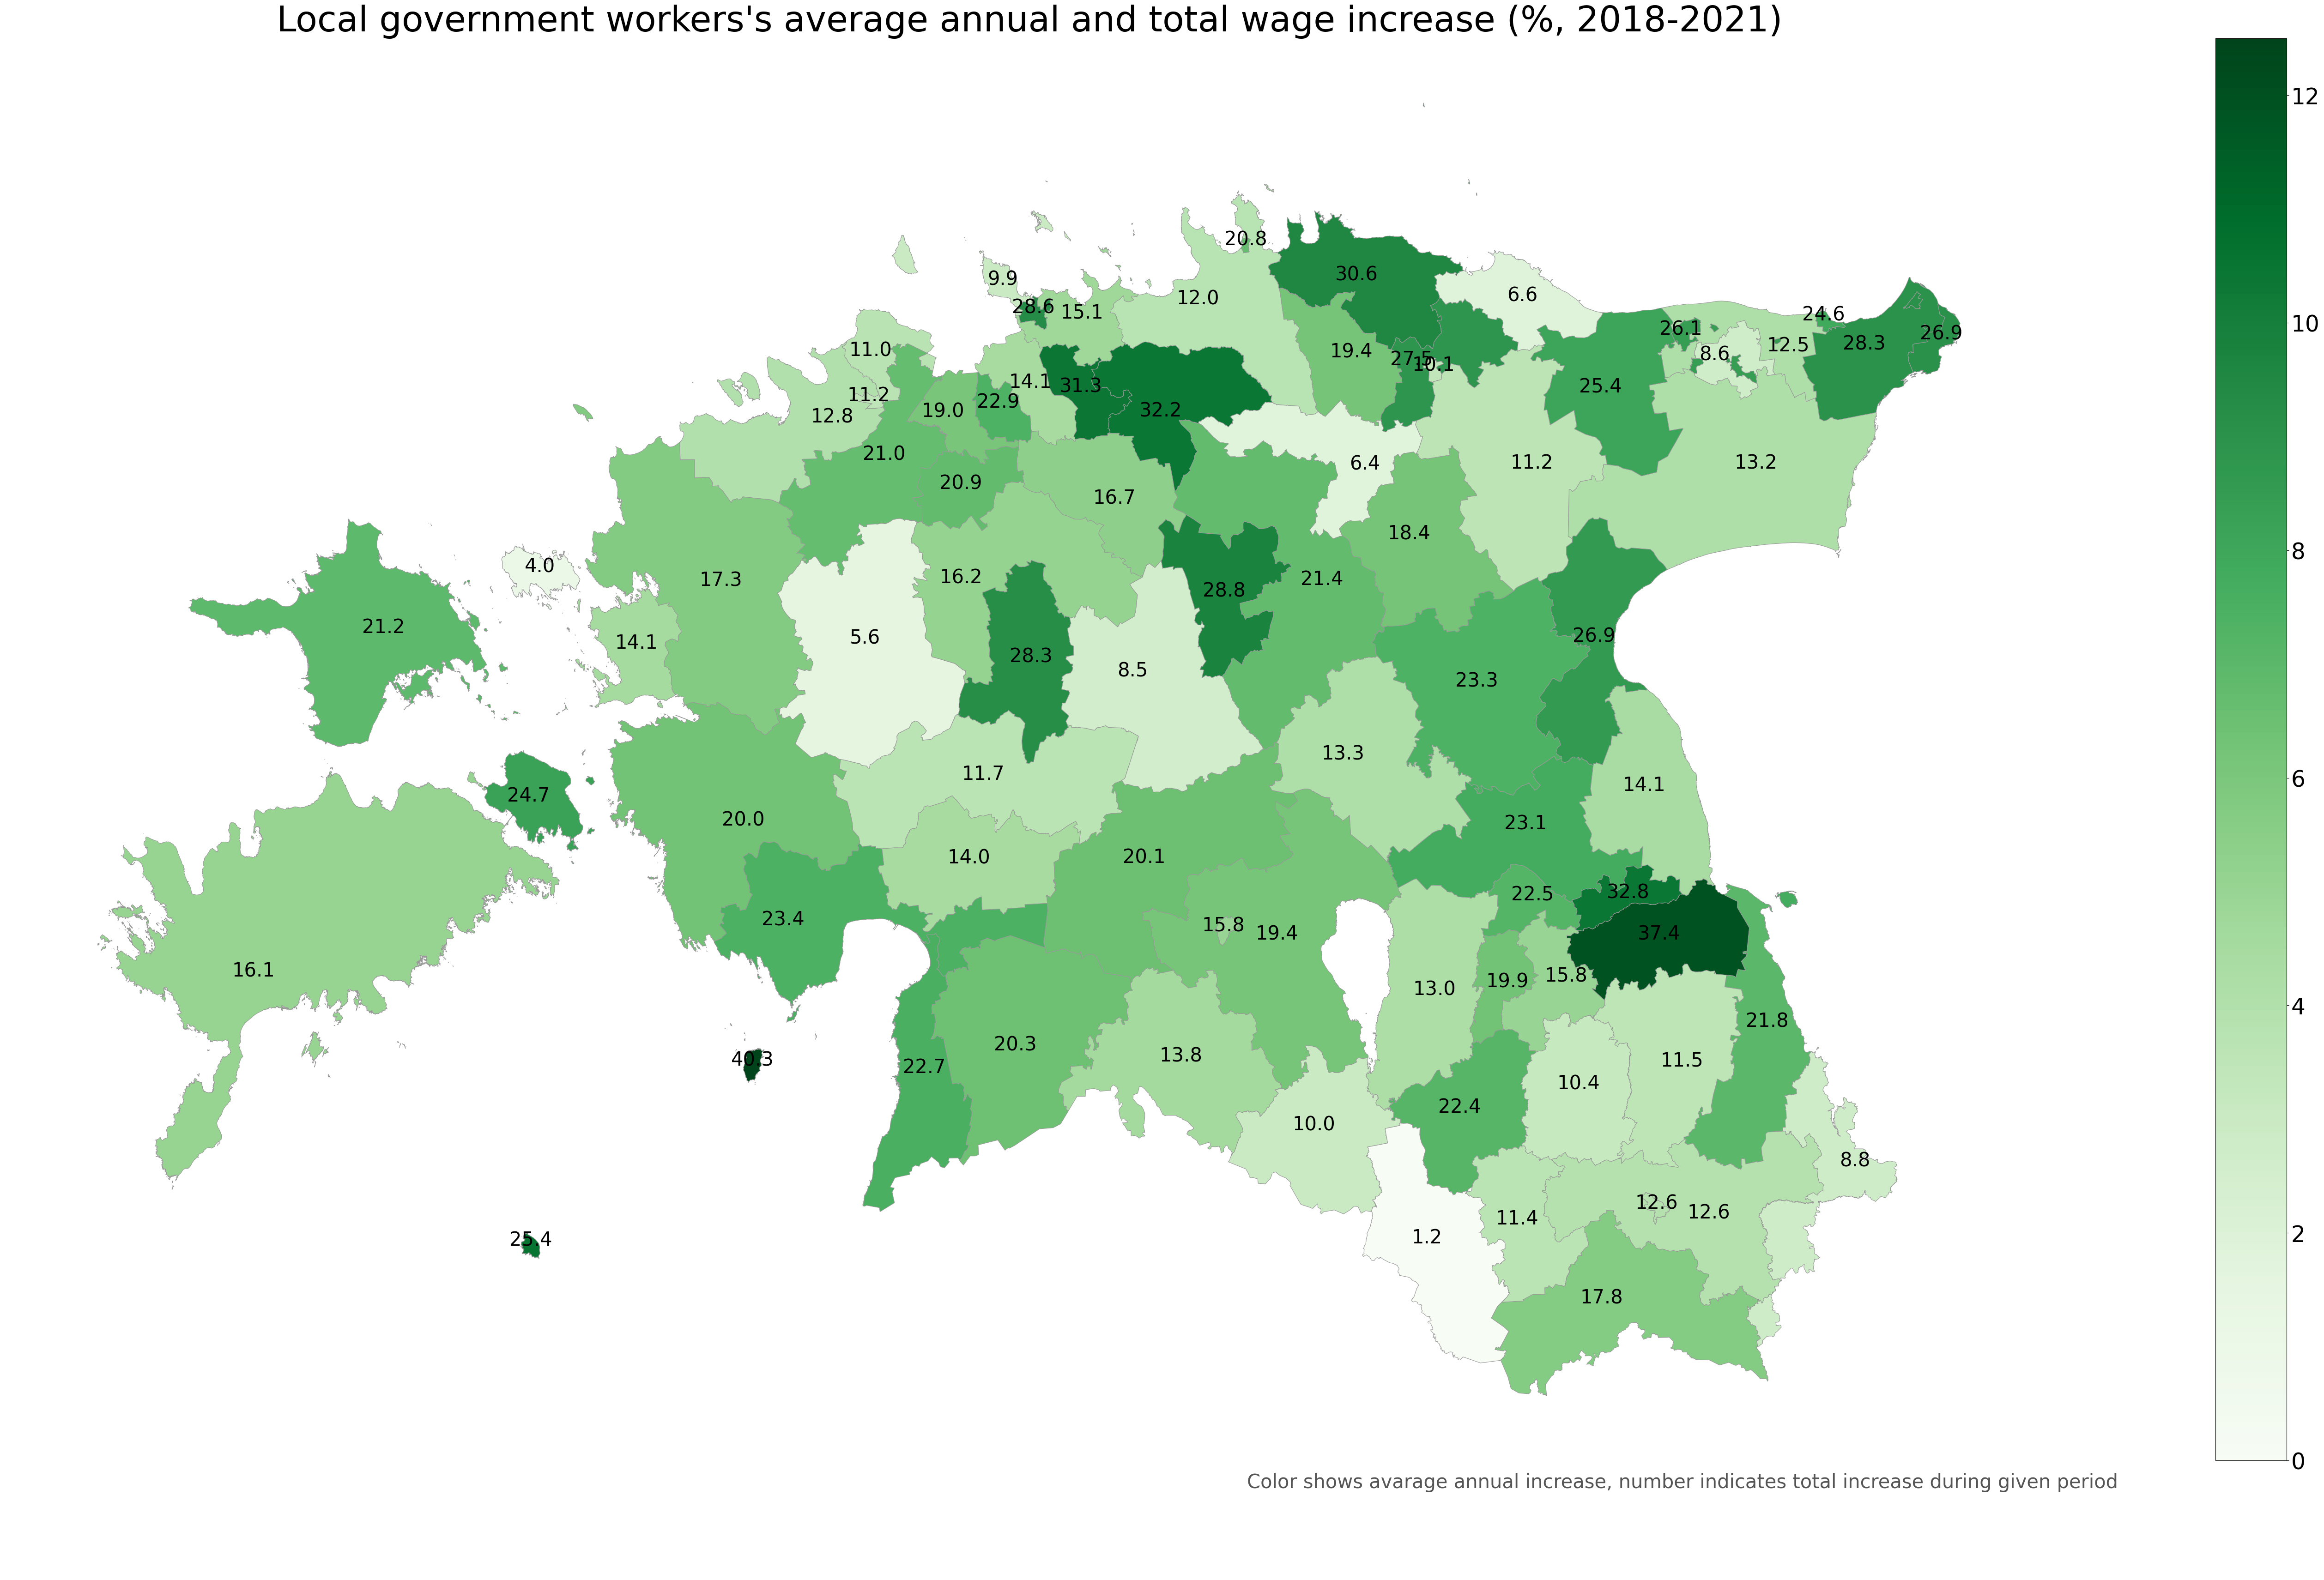

In [28]:
# protsentuaalne muutus
variable = 'Keskmine aastane muutus %'
vmin, vmax = 0, 12.5
fig, ax = plt.subplots(1, figsize=(90, 40))
ax.axis('off')
ax.set_title('Local government workers\'s average annual and total wage increase (%, 2018-2021)', fontdict={'fontsize': '55', 'fontweight' : '3'})
ax.annotate('Color shows avarage annual increase, number indicates total increase during given period', xy=(0.3, .05), xycoords='figure fraction', fontsize=30, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=35)

municipalities_merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.6')

municipalities_merged['coords'] = municipalities_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
municipalities_merged['coords'] = [coords[0] for coords in municipalities_merged['coords']]
for i, row in municipalities_merged.iterrows():
    plt.annotate(text=round(row['Muutus kokku %'], 1), xy=row['coords'], horizontalalignment='center', fontsize=30)

/var/folders/wg/4btjy_4s1x94459gqxsb1df80000gn/T/ipykernel_16037/1792645543.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


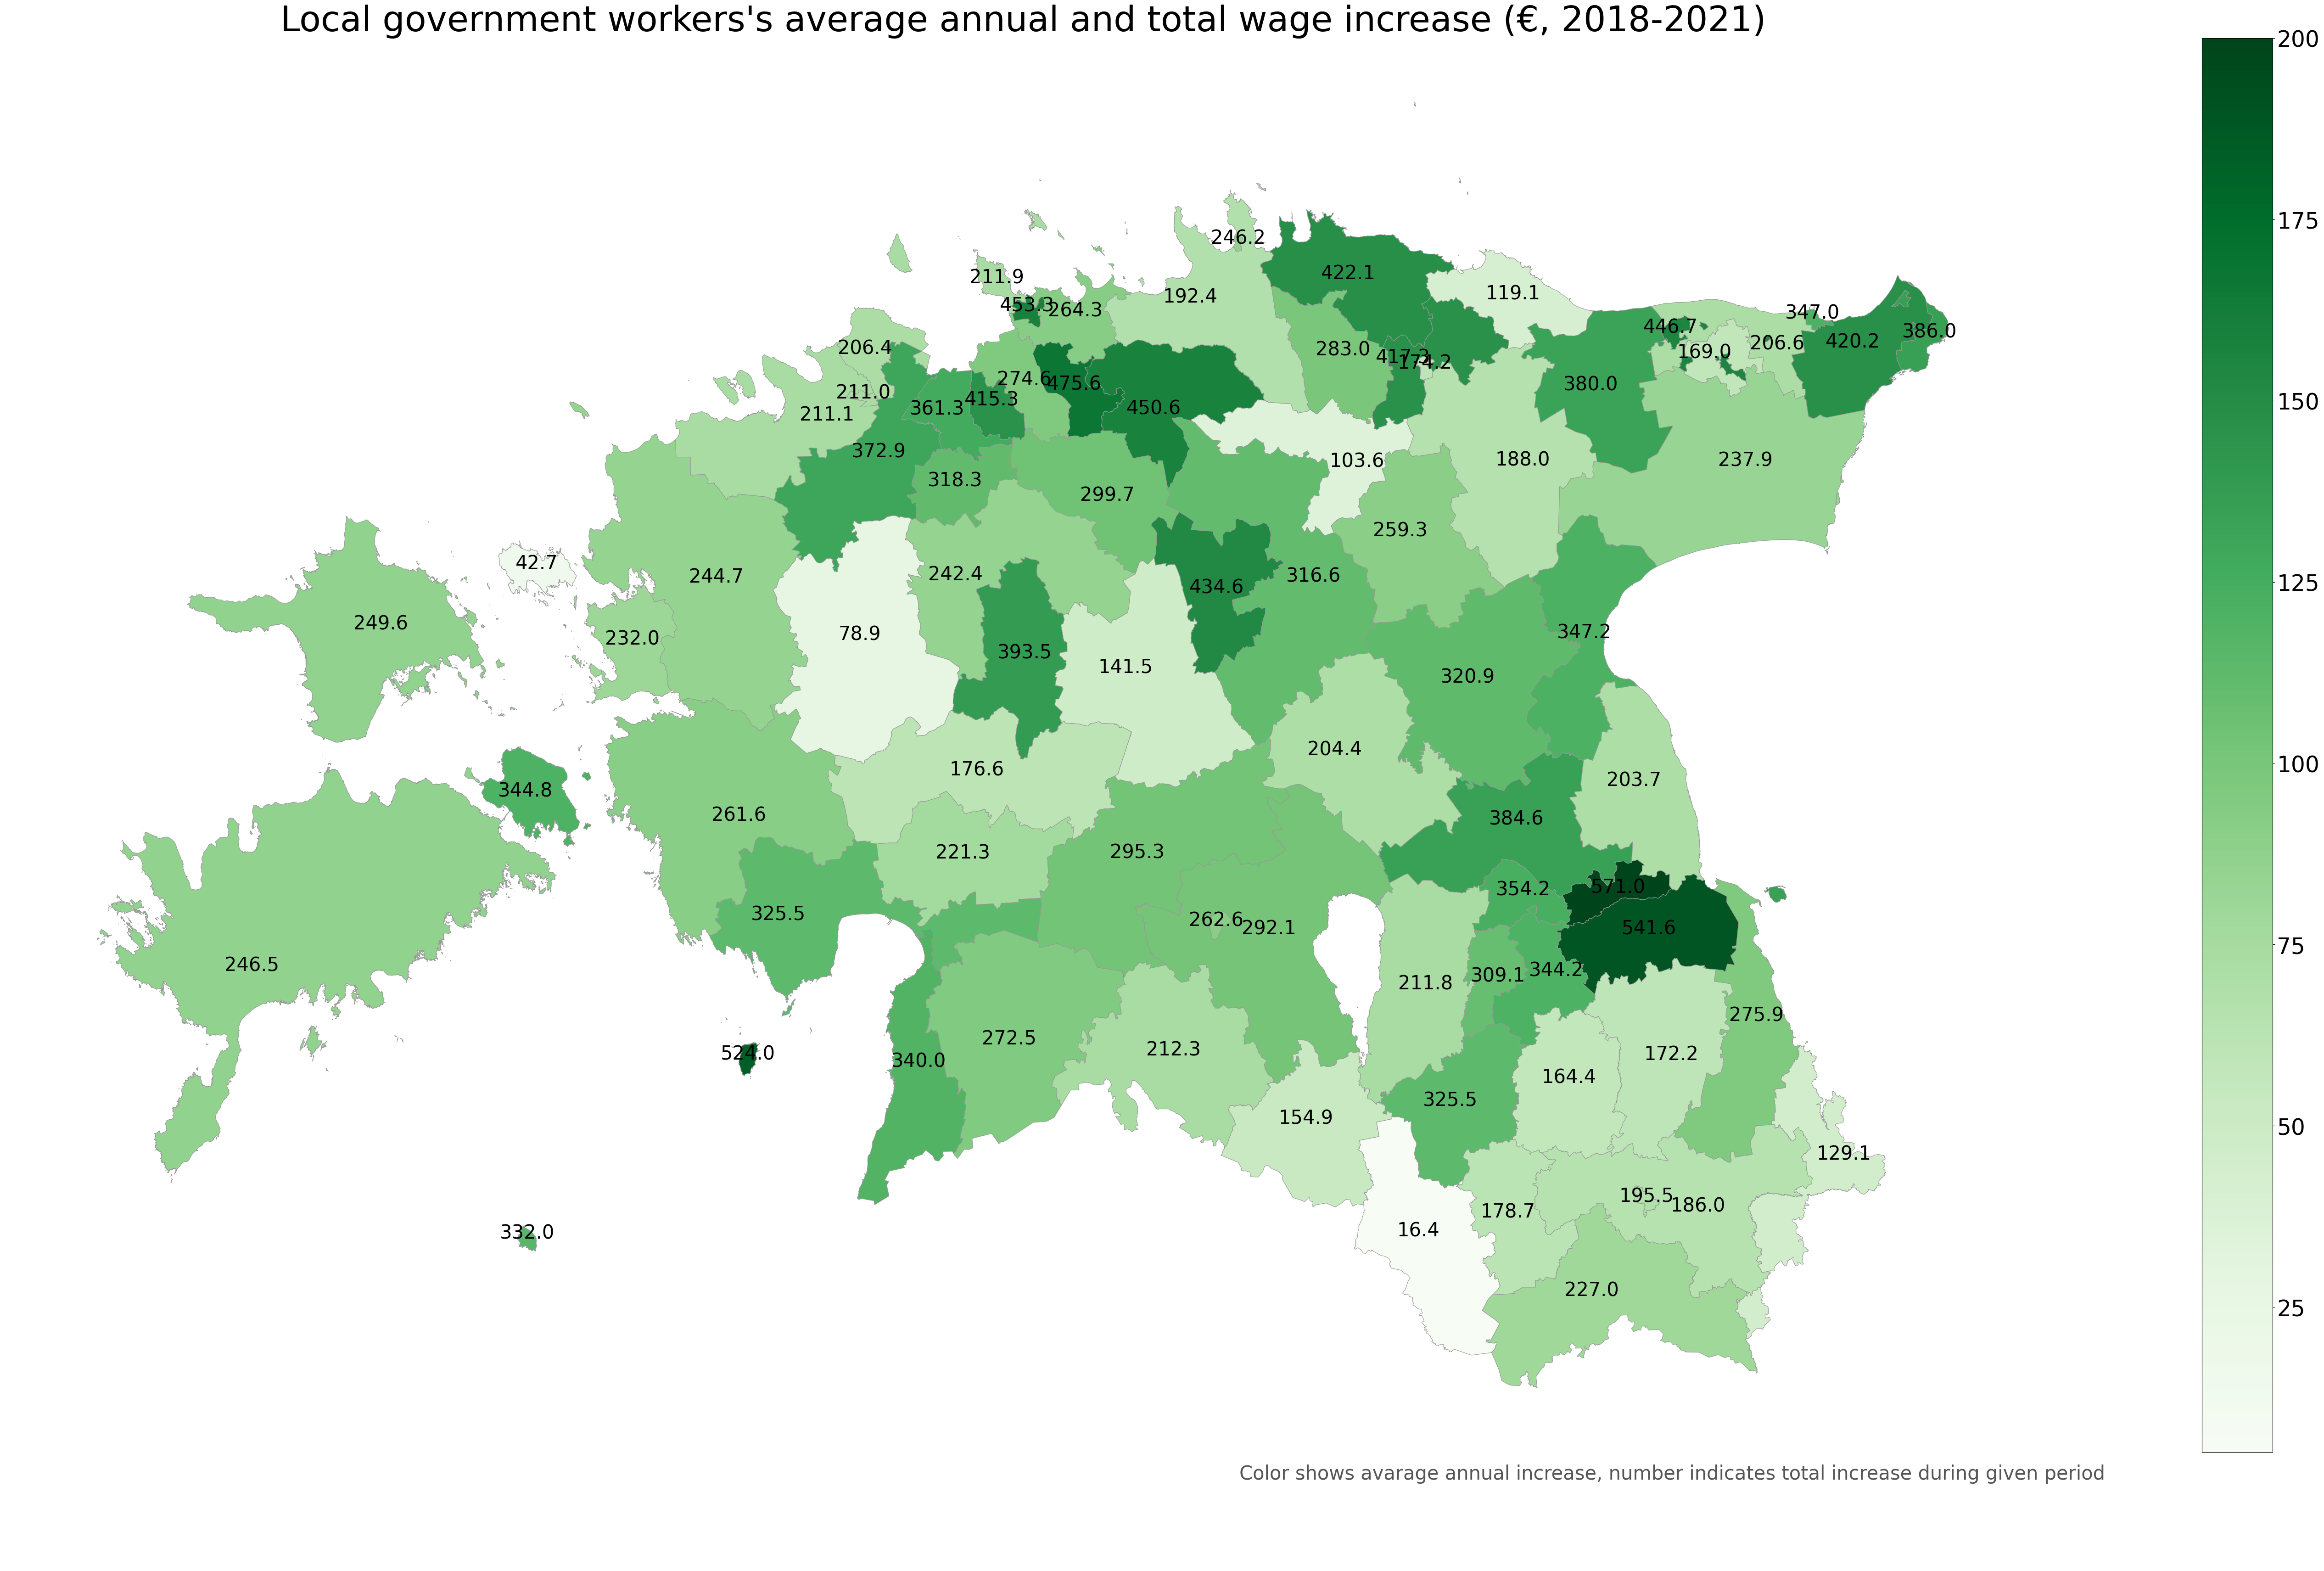

In [29]:
# rahaline muutus
variable = 'Keskmine aastane muutus €'
vmin, vmax = 5, 200
fig, ax = plt.subplots(1, figsize=(90, 40))
ax.axis('off')
ax.set_title('Local government workers\'s average annual and total wage increase (€, 2018-2021)', fontdict={'fontsize': '55', 'fontweight' : '3'})
ax.annotate('Color shows avarage annual increase, number indicates total increase during given period', xy=(0.3, .05), xycoords='figure fraction', fontsize=30, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=35)

municipalities_merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.6')

municipalities_merged['coords'] = municipalities_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
municipalities_merged['coords'] = [coords[0] for coords in municipalities_merged['coords']]
for i, row in municipalities_merged.iterrows():
    plt.annotate(text=round(row['Muutus kokku €'], 1), xy=row['coords'], horizontalalignment='center', fontsize=30)